## Multiple linear Regression Model (2nd try)

The theory behind the Multiple Linear regression model is in [this markdown file](Theory.md)

After implementing the clustering models of K-means, I am back to MLRM to give it a second try to implement it myself again.

I am on my vacations and have lots of perceived free time. (I am still very busy because trying to learn a lot of things this time.)

Let's get started with importing some modules.

In [14]:
from sklearn.datasets import make_sparse_uncorrelated

from matplotlib import pyplot as plt
import numpy as np 
%matplotlib inline

from matplotlib import style
style.use("ggplot")

### Generating a dataset

Let's generate some dataset.


<Figure size 4500x1500 with 0 Axes>

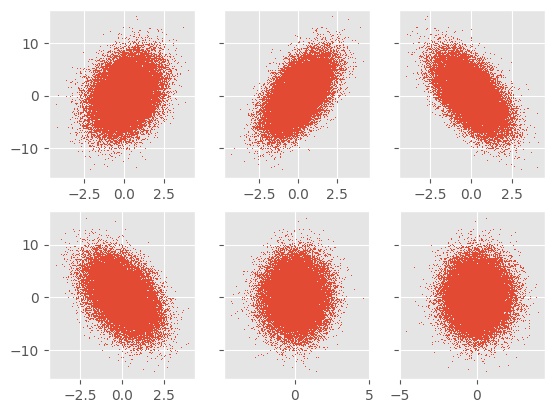

In [15]:

num_features = 6
num_samples = 40000

X, y = make_sparse_uncorrelated(n_samples=num_samples, n_features=num_features)

plt.figure(figsize=(45, 15))
fig, axs = plt.subplots(int(num_features/3), 3, sharey = True)

for i in range(num_features):
    axs[int(i/3), i%3].plot(X[:,i], y, ',')

## The MLRM class

The theory is detailed in [this file](Theory.md)

The information about the class is:

<table>
<tr><td colspan = 2> Name : multiple_linear_regression_model </td> </tr>
<tr><td> Datas </td> <td> Methods </td>
<tr><td>
<ol>
<li>weights: A vector containing individual weight for each feature</li>
</ol>
</td><td>
<ol>
<li>Apply: A method that applies the model to a set of features</li>
<li> mse_value : A method that calculates the mean squared loss value of the model for the training examples. </li>
<li> mse_gradient : A method that calculates the gradient for the mean squared loss against all the weight values, used for the gradient descent. </li>
</ol>
</td></tr>
</table>

The things that are done:

Datas:
- [x] weights

Methods
- [x] apply
- [x] mse_value
- [ ] mse_gradient


Shape of X = (40000, 6) and output = (40000,)
Shape of error = ()


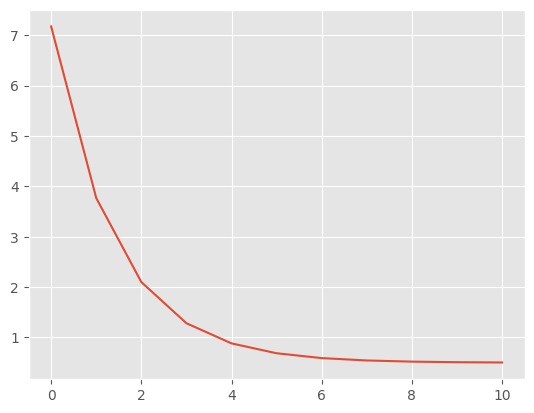

The final parameters that model settled for is = [ 0.99815006  1.9387984  -1.93971379 -1.437985    0.00482651  0.01337248] 


In [50]:
class multiple_linear_regression_model:
    def __init__(self, n_features: int):
        self.weights = np.random.rand(n_features)
    
    # The output of is of shape: (len(x),)
    def apply(self, x) -> float:
        fx = np.dot(x, self.weights)
        return fx
    
    def mse_value(self, x, y) -> float:
        lenx = len(x); assert(lenx == len(y))
        residuals = y - self.apply(x)
        squared_errors = residuals**2
        mse = sum(squared_errors) / (2 * lenx)
        return mse

    def neg_mse_gradient(self, x, y):
        lenx = len(x); assert(lenx == len(y))
        residuals = y - self.apply(x)
        individual_grads = residuals.reshape(-1,1) * x
        total_grad_sum = np.sum(individual_grads, axis = 0)
        mse_gradient = total_grad_sum * (1/lenx);
        return mse_gradient
    
    def mse_l1reg_value(self, x, y, reg_param) -> float:
        return self.mse_value(x, y) + np.linalg.norm(self.weights, 1) * (reg_param / len(x))
    
    def mse_l2reg_value(self, x, y, reg_param) -> float:
        return self.mse_value(x, y) + np.sum(self.weights ** 2) * (reg_param / (2* len(x)))
    
    def neg_mse_l1reg_gradient(self, x, y, reg_param):
        negl1grad = lambda x : -1 if x > 0 else 1
        return self.neg_mse_gradient(x, y) + np.vectorize(negl1grad)(self.weights) * (reg_param / len(x))
    
    def neg_mse_l2reg_gradient(self, x, y, reg_param):
        return self.neg_mse_gradient + self.weights * (-reg_param / len(x))
        

model = multiple_linear_regression_model(num_features)

print(f"Shape of X = {X.shape} and output = {model.apply(X).shape}")
print(f"Shape of error = {model.mse_value(X, y).shape}")

errors = [model.mse_value(X, y)]
learning_rate = .3

loopcount = 10
for i in range(loopcount):
    gradient = model.neg_mse_gradient(X, y)
    model.weights += learning_rate * gradient
    errors.append(model.mse_value(X, y))

plt.cla()
plt.plot(range(loopcount + 1), errors)
plt.show()

print(f"The final parameters that model settled for is = {model.weights} ")
    
        